<a href="https://colab.research.google.com/github/FGalvao77/Como-usar-a-API-Pytrends-para-obter-dados-de-tendencias-do-Google/blob/main/Como_usar_a_API_Pytrends_para_obter_dados_de_tend%C3%AAncias_do_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Como usar a `API Pytrends` para obter dados de tendências do Google**

---



**Uma breve visão geral:**

Nessa atividade iremos:

- utilizar a biblioteca `Pytrends` e a sintaxe de que você precisa para obter os dados do **Google Trends**.
    - demonstrar como obter dados de tendências do Google usando vários exemplos.

Como um ser humano curioso e inovador, você pode estar interessado em explorar este maravilhoso recurso para fazer previsões ou compreender o comportamento humano. A maneira mais fácil de fazer isso é usando a biblioteca **Pytrends**.

- O _Google Trends_ é um site de propriedade do Google que analisa a popularidade dos termos de pesquisa em várias regiões e idiomas. 

No site do [Google Trends](https://trends.google.com/trends/?geo=US), você pode ver palavras-chave de tendência, avaliar a popularidade de termos de pesquisa específicos em diferentes períodos de tempo, explorar palavras-chave relacionadas e muito mais. Eu encorajo você a verificar o site deles, se você nunca esteve lá antes. Cuidado, você provavelmente entrará em uma toca de coelho  ; ).

- O _Pytrends_, de acordo com a página [Pytrends PyPI](https://pypi.org/project/pytrends/), é uma `API não oficial do Google Trends` que pode ser usada para extrair informações úteis de pesquisa usando uma interface simples. 

Esteja ciente de que, devido ao status não oficial da API, qualquer alteração no back-end do Google Trend pode afetar a capacidade do usuário de usar a biblioteca. Certifique-se de que o Pytrends ainda esteja ativo e atualizado.

## **Configurando seu ambiente**

Para usar a API Pytrends, você precisará fazer o seguinte:

- Certifique-se de ter uma conexão com a Internet;
- Abra seu prompt de comando e certifique-se de que você pode executar `python` e `pip` a partir de seu prompt de comando.
- Execute `“!pip install pytrends”` para instalar a biblioteca Pytrends.
- Observe que durante a instalação, o pip pode precisar instalar `Requests`, `lxml` e `Pandas`. Este é um comportamento normal, pois essas bibliotecas são necessárias para que o Pytrends funcione corretamente.
- Execute `“!pip freeze”` para exibir as bibliotecas Python instaladase, verifique se **Pytrends** aparece na lista.

In [78]:
# instalando a biblioteca
!pip install pytrends

In [79]:
# atualizando os diretórios
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 https://developer.download.nvidia.com/compute/c

In [80]:
# removendo apicações obsoletas
!apt autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libnvidia-common-460
0 upgraded, 0 newly installed, 1 to remove and 60 not upgraded.
After this operation, 35.8 kB disk space will be freed.
(Reading database ... 155062 files and directories currently installed.)
Removing libnvidia-common-460 (460.91.03-0ubuntu1) ...


In [81]:
# verificando as bibliotecas instaladas
!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==21.1.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.5.30
cffi==1.14.6
cftime==1.5.1
chardet==3.0.4
charset-normalizer==2.0.7
clang==5.0
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed=

In [140]:
# importndo o método "TrendReq" do módulo "pytrends.request"
from pytrends.request import TrendReq

# executndo o método "TrendReq" passando os parâmetros de idioma do host (hl) e fuso horário (tz)
pytrends = TrendReq(hl='en-US', tz=360)

In [142]:
# construindo uma lista de palavras-chave
kw_list = ['bolsonaro', 'fake news', 'golpe', 'stf'] 

# construindo a carga útil
pytrends.build_payload(kw_list, timeframe='2015-01-01 2021-10-31', geo='BR')

- kw_list: uma lista de palavras-chave para obter dados (limite de 5 palavras-chave por vez)
- timeframe: o prazo de interesse.
- geo: a localização geográfica.

Depois de construir a carga útil, você pode começar a extrair informações úteis usando vários métodos Pytrends. 

Vamos ver alguns exemplos!



### **Exemplo 1: Interesse ao longo do tempo**

In [143]:
# importando a biblioteca "pandas"
import pandas as pd

# armazenando as informações de interesse ao longo do tempo em dataframe
df = pytrends.interest_over_time()

In [144]:
# visualizando as 20 primeiras linhas do dataframe
print(df.head(20))

            bolsonaro  fake news  golpe  stf isPartial
date                                                  
2015-01-01          0          0      1    1     False
2015-02-01          0          0      1    1     False
2015-03-01          0          0      2    2     False
2015-04-01          1          0      1    2     False
2015-05-01          0          0      1    2     False
2015-06-01          0          0      1    2     False
2015-07-01          0          0      1    1     False
2015-08-01          0          0      1    2     False
2015-09-01          0          0      1    2     False
2015-10-01          1          0      1    2     False
2015-11-01          1          0      1    2     False
2015-12-01          1          0      1    2     False
2016-01-01          1          0      1    1     False
2016-02-01          1          0      1    2     False
2016-03-01          2          0      2    3     False
2016-04-01          5          0      2    3     False
2016-05-01

In [145]:
# visualizando as 20 últimas linhas do dataframe
print(df.tail(20))

            bolsonaro  fake news  golpe  stf isPartial
date                                                  
2020-03-01         28          1      1    1     False
2020-04-01         28          1      1    3     False
2020-05-01         25          1      1    4     False
2020-06-01         15          1      1    3     False
2020-07-01         14          1      1    1     False
2020-08-01          8          1      1    2     False
2020-09-01          8          1      1    2     False
2020-10-01          7          1      1    2     False
2020-11-01          8          1      1    1     False
2020-12-01          7          0      1    2     False
2021-01-01         14          0      1    1     False
2021-02-01          7          0      1    2     False
2021-03-01         13          1      2    3     False
2021-04-01          9          1      1    3     False
2021-05-01         11          1      1    2     False
2021-06-01         13          1      1    2     False
2021-07-01

In [146]:
# visualizando estatística descritivas do dataframe
df.describe()

,bolsonaro,fake news,golpe,stf
count,82.000000,82.000000,82.000000,82.000000
mean,9.158537,0.317073,1.060976,2.036585
std,14.647689,0.541558,0.240758,0.908738
min,0.000000,0.000000,1.000000,1.000000
25%,1.250000,0.000000,1.000000,2.000000
50%,4.500000,0.000000,1.000000,2.000000
75%,11.750000,1.000000,1.000000,2.000000
max,100.000000,3.000000,2.000000,7.000000


In [147]:
# importando o matplotlib para visualização gráfica dos dados
import matplotlib.pyplot as plt

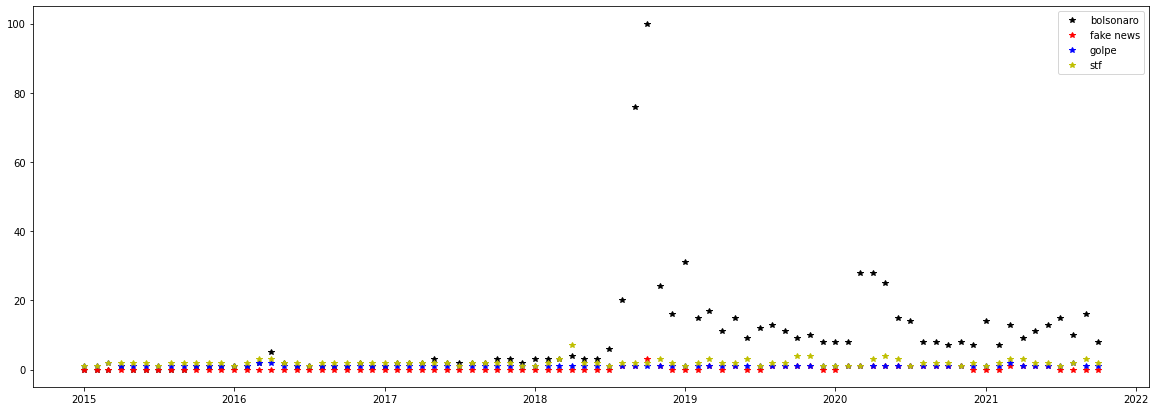

In [148]:
# plotando todas as quatro tendências no mesmo gráfico
plt.figure(figsize=(20, 7))
plt.plot(df.index, df.bolsonaro,'k*')
plt.plot(df.index, df['fake news'],'r*')
plt.plot(df.index, df.golpe,'b*')
plt.plot(df.index, df.stf, 'y*')
plt.legend(['bolsonaro','fake news','golpe', 'stf']);

> Vamos analisar o gráfico:

- `bolsonaro` é mais popular do que os demais termos.
    - A popularidade do termo **bolsonaro**, teve um pico no final de 2019 e depois uma queda abrupta. E partir de então, mantendo uma "constante" entre alguns picos e baixas.

Podemos melhorar nossa visualização plotando um gráfico de `série temporal`.


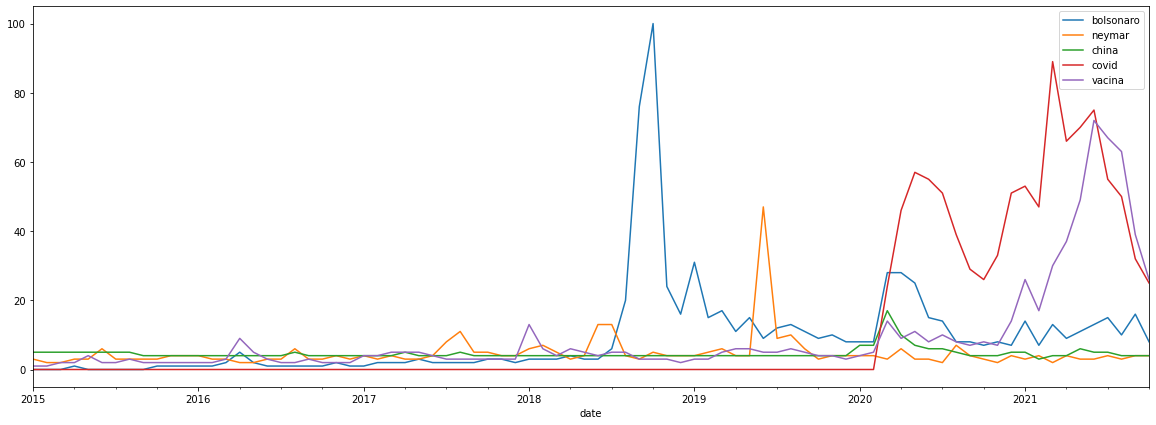

In [149]:
# instanciando o pytrends
pytrends = TrendReq(hl='por-BR', tz=360)

# criando uma lista com novos termos
kw_list = ['bolsonaro', 'neymar', 'china', 'covid', 'vacina'] 

# definindo a pesquisa com a lista de termos, espaço de tempo e localização
pytrends.build_payload(kw_list, timeframe='2015-01-01 2021-10-31', geo='BR')

# criando um dataframe com o resultado da pesquisa
df2 = pytrends.interest_over_time()

# plotando o gráfico de série temporal
df2.plot(figsize=(20, 7));

E assim, podemos visualizar outros termos conforme nossos interesses.

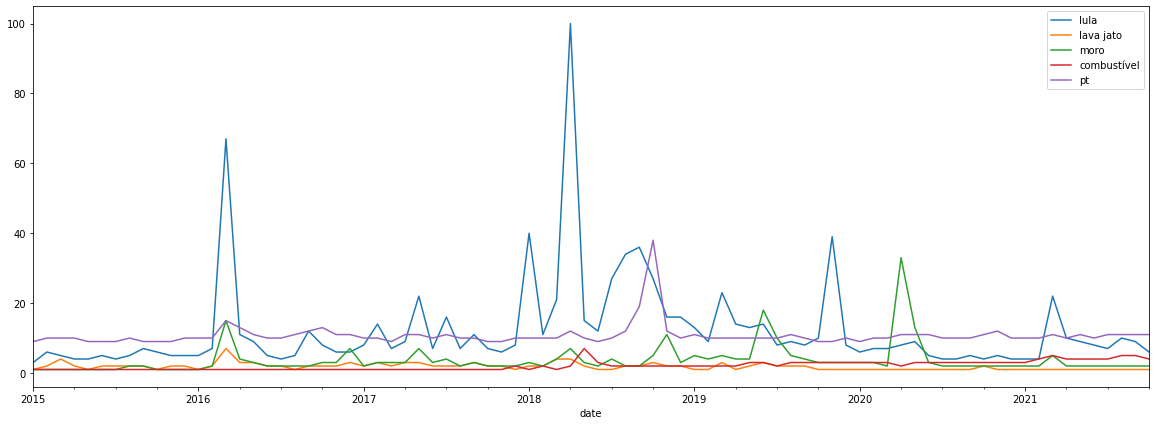

In [150]:
# instanciando o pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# criando uma lista com os termos
kw_list = ['lula', 'lava jato', 'moro', 'combustível', 'pt'] 

# definindo a pesquisa com a lista de termos, espaço de tempo e localização
pytrends.build_payload(kw_list, timeframe='2015-01-01 2021-10-31', geo='BR')

# criando um dataframe com o resultado da pesquisa
df3 = pytrends.interest_over_time()

# plotando o gráfico de série temporal
df3.plot(figsize=(20, 7));

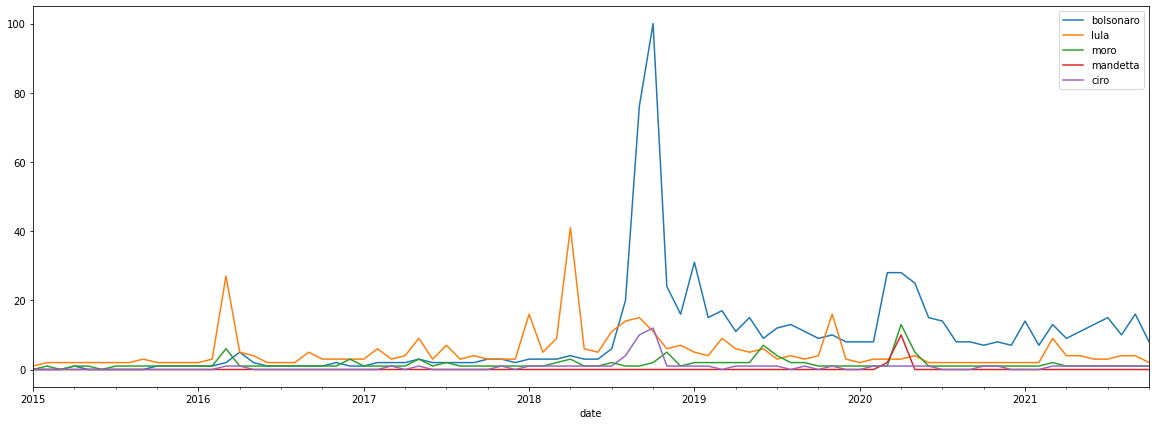

In [151]:
# instanciando o pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# criando uma lista com os termos
kw_list = ['bolsonaro', 'lula', 'moro', 'mandetta', 'ciro'] 

# definindo a pesquisa com a lista de termos, espaço de tempo e localização
pytrends.build_payload(kw_list, timeframe='2015-01-01 2021-10-31', geo='BR')

# criando um dataframe com o resultado da pesquisa
df4 = pytrends.interest_over_time()

# plotando o gráfico de série temporal
df4.plot(figsize=(20, 7));

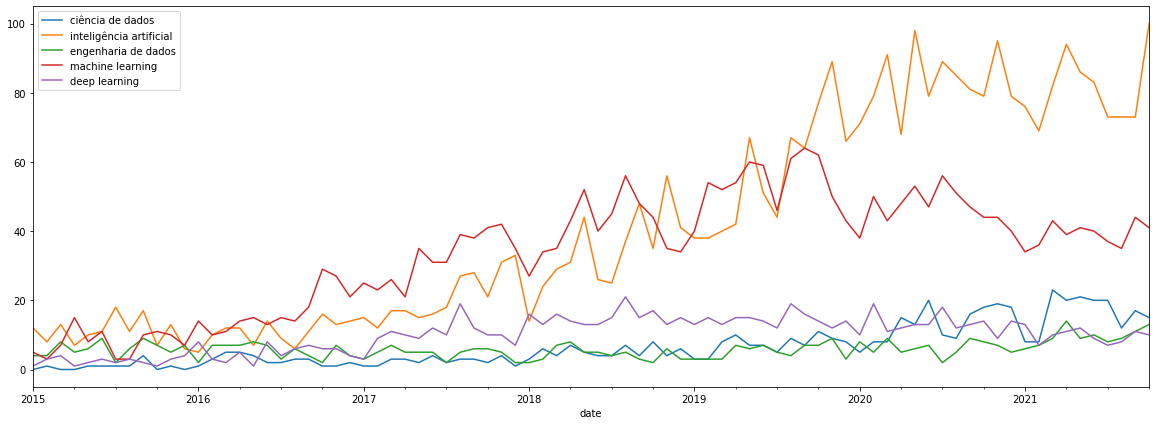

In [152]:
# instanciando o pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# criando uma lista com os termos
kw_list = ['ciência de dados', 'inteligência artificial', 'engenharia de dados', 
           'machine learning', 'deep learning'] 

# definindo a pesquisa com a lista de termos, espaço de tempo e localização
pytrends.build_payload(kw_list, timeframe='2015-01-01 2021-10-31', geo='BR')

# criando um dataframe com o resultado da pesquisa
df5 = pytrends.interest_over_time()

# plotando o gráfico de série temporal
df5.plot(figsize=(20, 7));

In [159]:
# criando uma lista com os termos
kw_list = ['ciência de dados', 'inteligência artificial', 'engenharia de dados', 
           'machine learning', 'deep learning'] 

# construindo a carga útil
pytrends.build_payload(kw_list, cat=None, timeframe='2015-01-01 2021-10-31', geo='BR') 

# salvando o interesse com o tempo
df6 = pytrends.interest_over_time()

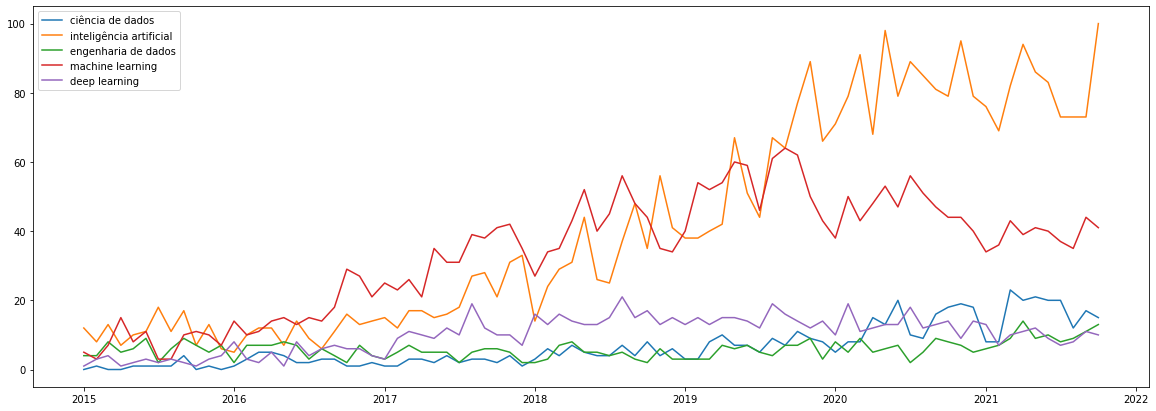

In [160]:
# traçando tendências dos termos ao longo do tempo
plt.figure(figsize=(20, 7))

plt.plot(df6.index, df6['ciência de dados'])
plt.plot(df6.index, df6['inteligência artificial'])
plt.plot(df6.index, df6['engenharia de dados'])
plt.plot(df6.index, df6['machine learning'])
plt.plot(df6.index, df6['deep learning'])

plt.legend(['ciência de dados', 'inteligência artificial', 'engenharia de dados', 
           'machine learning', 'deep learning']);

Vamos normalizar os termos para uma visualização mais adequada.

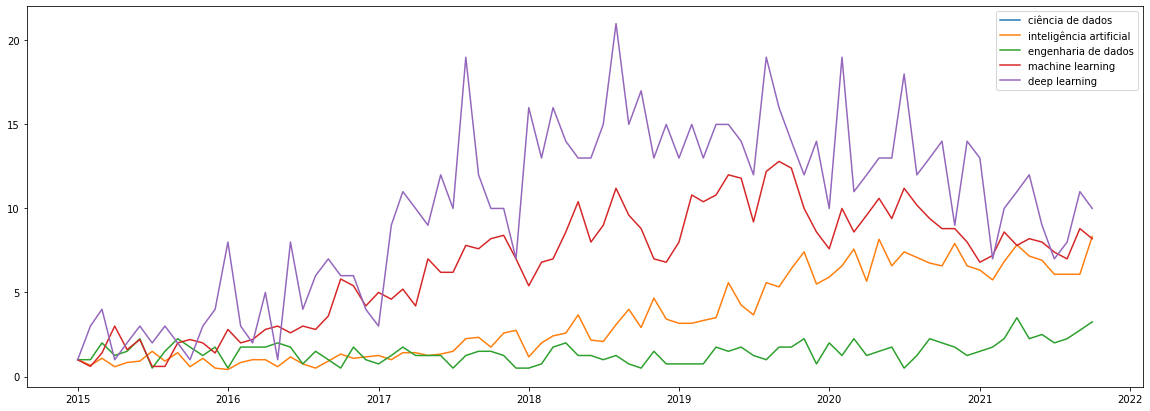

In [161]:
# visualizando tendências normalizadas ao longo do tempo
plt.figure(figsize=(20, 7))

plt.plot(df6.index, df6['ciência de dados'] / df6['ciência de dados'].iloc[0])
plt.plot(df6.index, df6['inteligência artificial'] / df6['inteligência artificial'].iloc[0])
plt.plot(df6.index, df6['engenharia de dados'] / df6['engenharia de dados'].iloc[0])
plt.plot(df6.index, df6['machine learning'] / df6['machine learning'].iloc[0])
plt.plot(df6.index, df6['deep learning'] / df6['deep learning'].iloc[0])

plt.legend(['ciência de dados', 'inteligência artificial', 'engenharia de dados', 
           'machine learning', 'deep learning']);

Embora o interesse ao longo do tempo seja interessante, você pode usar o Google Trends para encontrar tópicos relacionados, consultas e / ou sugestões. 

Para fazer isso, você pode usar os métodos `related_topics( )`, `related_queries( )` e `suggest( )`.

Primeiro, vamos examinar os tópicos relacionados.

In [162]:
# construindo a carga útil
pytrends.build_payload(kw_list=['bolsonaro'], timeframe='2015-01-01 2021-10-31', geo='BR') 

# obtendo os tópicos relacionados
df_bolsonaro = pytrends.related_topics()

In [163]:
# exibindo os 5 principais resultados crescentes para a palavra-chave "bolsonaro"
print(df_bolsonaro['bolsonaro']['rising'].head(5))

    value  ...                                         topic_type
0  113850  ...                          Former Mayor of São Paulo
1  101250  ...  Former Minister of Justice and Public Security...
2   61200  ...                                              Court
3   61150  ...                                              Topic
4   58750  ...                                  Election campaign

[5 rows x 6 columns]


In [164]:
# exibindo os 5 principais resultados para a palavra-chave "bolsonaro"
print(df_bolsonaro['bolsonaro']['top'].head(5))

   value  ...                              topic_type
0    100  ...                     President of Brazil
1      3  ...                        Government title
2      2  ...              Former President of Brazil
3      2  ...                       Organization type
4      2  ...  Member of the Brazilian Federal Senate

[5 rows x 7 columns]


A seguir, vamos examinar as consultas relacionadas.

In [165]:
# construindo a carga útil
pytrends.build_payload(kw_list=['bolsonaro'], timeframe='2015-01-01 2021-10-31', geo='BR') 

# obtendo as consultas relacionadas
df_bolsonaro = pytrends.related_queries()

In [166]:
# visualizando o "df_bolsonaro"
print(df_bolsonaro)

{'bolsonaro': {'top':                        query  value
0             jair bolsonaro    100
1   bolsonaro jair bolsonaro     99
2       bolsonaro presidente     25
3             bolsonaro hoje     23
4          governo bolsonaro     21
5                       lula     20
6          eduardo bolsonaro     19
7             bolsonaro 2018     17
8          twitter bolsonaro     16
9           flavio bolsonaro     13
10           video bolsonaro     13
11        noticias bolsonaro     12
12          carlos bolsonaro     12
13      entrevista bolsonaro     11
14                    haddad     10
15     bolsonaro coronavirus     10
16          bolsonaro haddad     10
17        michelle bolsonaro     10
18         partido bolsonaro     10
19           filho bolsonaro     10
20        bolsonaro pesquisa      9
21                      moro      9
22        bolsonaro facebook      9
23              g1 bolsonaro      9
24            bolsonaro moro      9, 'rising':                          query 

Finalmente, podemos obter sugestões de palavras-chave de pesquisa, conforme mostrado abaixo.

In [167]:
# obtendo sugestões
df_bolsonaro = pytrends.suggestions('bolsonaro')

# visualizando o "df_bolsonaro"
df_bolsonaro

[{'mid': '/m/04g5q20',
  'title': 'Jair Bolsonaro',
  'type': 'President of Brazil'},
 {'mid': '/g/121bkngt',
  'title': 'Carlos Bolsonaro',
  'type': 'Brazilian Politician'},
 {'mid': '/g/11fj7hx85_',
  'title': 'Michelle Bolsonaro',
  'type': 'First Lady of Brazil'},
 {'mid': '/g/11b6dns827',
  'title': 'Renan Bolsonaro',
  'type': "Jair Bolsonaro's son"},
 {'mid': '/g/11b6c5_t3j',
  'title': 'Eduardo Bolsonaro',
  'type': 'Member of the Chamber of Deputies of Brazil'}]

### **Exemplo 2: Tendências de pesquisa e principais gráficos de pesquisa**

No conjunto final de exemplos, vamos dar uma olhada nas tendências e nos principais resultados da pesquisa. Este caso de uso é mais exploratório do que os outros e ajuda a responder à pergunta “o que as outras pessoas estão procurando”. Primeiro, vamos dar uma olhada nas pesquisas de tendência.

In [168]:
# visualizando as principais tendências do EUA
pytrends.trending_searches(pn='united_states')

,0
0,Steelers
1,Buffalo Bills
2,Mike White
3,Colts
4,Happy Halloween!
5,Dak Prescott
6,Calvin Ridley
7,49ers vs Bears
8,Broncos
9,India vs New Zealand


In [169]:
# visualizando as principais tendências do Brasil
pytrends.trending_searches(pn='brazil')

,0
0,Atletico de Madrid
1,Harry Styles
2,Maquinas Mortais
3,Inter de Milão
4,Leeds
5,Roma x Milan
6,Próximo jogo do Flamengo
7,Aston Villa
8,Dia do Saci
9,Athletico-pr


Para obter os melhores resultados, você deve incluir a data, o idioma do host (hl), fuso horário (tz) e localização geográfica (geo) são entradas opcionais.

In [175]:
# visualizando as principais tendências do Brasil do ano de 2020
pytrends.top_charts(date='2020', hl='por-BR', tz=360, geo='BR')

,title,exploreQuery
0,Coronavírus,coronavirus
1,Auxílio emergencial,
2,Eleições 2020,
3,Eleições EUA,eleicoes eua
4,BBB 2020,bbb20
5,Copa do Brasil,
6,Google Classroom,
7,Flamengo x São Paulo,
8,Classificação Brasileirão série A,
9,NBA,nba


In [178]:
# visualizando as principais tendências do EUA do ano de 2020
pytrends.top_charts(date='2020', hl='en-US', tz=360, geo='US')

,title,exploreQuery
0,Election results,
1,Coronavirus,
2,Kobe Bryant,
3,Coronavirus update,
4,Coronavirus symptoms,
5,Zoom,
6,Who is winning the election,
7,Naya Rivera,
8,Chadwick Boseman,
9,PlayStation 5,PS5


Antes de concluir nossa discussão sobre o uso de Pytrends, gostaria de deixar um breve aviso. 

Como qualquer site, o Google tem termos de serviço específicos que você deve revisar antes de usar o Pytrends. Se você usar excessivamente a API do Pytrends, o Google limitará o seu acesso ao site. De acordo com a página Pytrends PyPI, o limite da taxa de solicitação do Google Trends não é conhecido publicamente. 

Aparentemente, um usuário relatou que 1.400 solicitações sequenciais em um período de 4 horas os levaram ao limite, mas isso provavelmente varia de acordo com o tamanho da consulta e a frequência da solicitação. Ao atingir o limite da taxa, o Google irá controlar as solicitações futuras.

### **Uma rápida revisão do que você aprendeu**

Se você chegou até aqui, está mais do que pronto para usar o Pytrends em seu aplicativo. Especificamente, você aprendeu:

- Como instalar a biblioteca Pytrends;
- Como estabelecer uma conexão com o Google e construir uma carga útil de API usando Pytrends;
- Como obter interesse ao longo do tempo por várias palavras-chave por localização geográfica, fusos horários e intervalos de datas;
- Como obter tópicos, consultas e sugestões relacionados a palavras-chave e,
- Como identificar tendências e principais resultados de pesquisa.

## **Referências:**

- Pytrends 4.7.3. https://pypi.org/project/pytrends/
- Tendências do Google. https://trends.google.com/trends/?geo=US

